# 1 - Image transformation

A function or operator that takes an image as its input and produces an image as its output. Depending on the transform chosen, the input and output images may appear entirely different and have different interpretations [1]. Here we'll see some basic transformations, like: **cropping, flipping, rotation and resizing** [2].

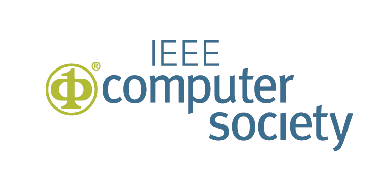

In [31]:
# Importing OpenCV library
import cv2

# Importing library to show our images
from matplotlib import pyplot as plt

# Importing library to manipulate our images
import numpy as np

# Reading some image
img = cv2.imread('images/cs.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Showing our image
plt.axis("off")
plt.imshow(img)
plt.show()

## 1.1) Cropping

To crop an image in python, it is possible use ranges, like that:

```python
new_image = image[start_row : end_row, start_col : end_col]
```

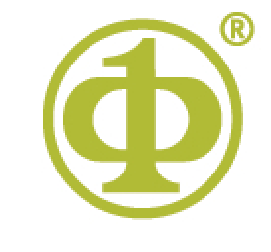

In [32]:
# Cropping our image
cropped = img[100:210,20:135]

plt.axis("off")
plt.imshow(cropped)
plt.show()

## 1.2) Flipping

The operation of flipping an image vertically is satisfied by a simple matrices multiplication between $A$ and $B$. The matrix $A$ is the image and has dimension $M \times N$, and $B$ is an **antidiagonal** matrix of *ones*, with dimension $N \times N$.  

$$A_{m,n} = 
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n} 
 \end{pmatrix}, 
 B_{n,n} = 
 \begin{pmatrix}
  0 & 0 & \cdots & 1 \\
  0 & 0 & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  1 & 0 & \cdots & 0 
 \end{pmatrix}$$
 
 $$A_{m,n} \times B_{n,n} = 
 \begin{pmatrix}
  a_{1,n} & \cdots & a_{1,2} & a_{1,1} \\
  a_{2,n} & \cdots & a_{2,2} & a_{2,1} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,n} & \cdots & a_{m,2} & a_{m,1} 
 \end{pmatrix}$$
 
To apply the operation of flipping an image horizontally, you should invert the position of $A$ and $B$ on multiplication. The matrix $A$ is the image and has dimension $M \times N$, and $B$ is an **antidiagonal** matrix of *ones*, with dimension $M \times M$.

$$ B_{m,m} = 
 \begin{pmatrix}
  0 & 0 & \cdots & 1 \\
  0 & 0 & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  1 & 0 & \cdots & 0 
 \end{pmatrix}, A_{m,n} = 
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n} 
 \end{pmatrix}$$
 
 $$B_{m,m} \times A_{m,n} = 
 \begin{pmatrix} 
  a_{m,1} & a_{m,2} & \cdots & a_{m,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} 
 \end{pmatrix}$$

The operation of flipping image on both directions uses three matrices. An **antidiagonal** matrix of *ones* $A$, with dimension $M \times M$, a matrix $B$ representing the image, with dimension $M \times N$, and a matrix $C$, also an **antidiagonal** matrix of *ones*, with dimension $N \times N$.  

$$ A_{m,m} = 
 \begin{pmatrix}
  0 & 0 & \cdots & 1 \\
  0 & 0 & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  1 & 0 & \cdots & 0 
 \end{pmatrix}, B_{m,n} = 
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n} 
 \end{pmatrix}, C_{n,n} = 
 \begin{pmatrix}
  0 & 0 & \cdots & 1 \\
  0 & 0 & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  1 & 0 & \cdots & 0 
 \end{pmatrix}$$
 
 $$A_{m,m} \times B_{m,n} \times C_{n,n} = 
 \begin{pmatrix} 
  a_{m,n} & \cdots & a_{m,2} & a_{m,1} \\
  \vdots  & \ddots & \vdots  & \vdots  \\
  a_{2,n} & \cdots & a_{2,2} & a_{2,1} \\
  a_{1,n} & \cdots & a_{1,2} & a_{1,1} 
 \end{pmatrix}$$

With OpenCV, it is possoble to use the following function: 

<center>
    <strong>cv2.flip(img, flipCode) → img</strong>
</center>

where:

<ul>
    <li><i>img</i> – Image.</li>
    <li><i>flipCode</i> – A flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes (see the discussion below for the formulas).</li>
</ul>

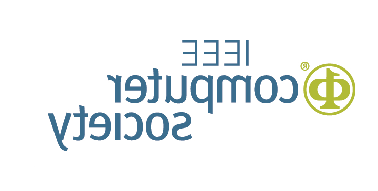

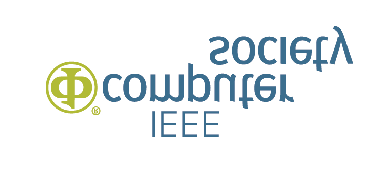

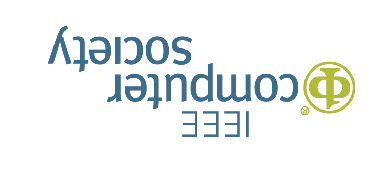

In [33]:
# vertically inverted image
v_flipped = cv2.flip(img, 1)

plt.figure()
plt.axis("off")
plt.imshow(v_flipped)
plt.show()

# horizontally inverted image
h_flipped = cv2.flip(img, 0)

plt.figure()
plt.axis("off")
plt.imshow(h_flipped)
plt.show()

# vertically and horizontally inverted image
flipped = cv2.flip(img, -1)

plt.figure()
plt.axis("off")
plt.imshow(flipped)
plt.show()

## 1.3) Rotation

To rotate an image, it is initially necessary to define a rotation center, like that:

<center>
    <strong>cv2.getRotationMatrix2D(center, angle, scale) → retval</strong>
</center>

where:

<ul>
    <li><i>center</i> – Center of the rotation in the source image.</li>
    <li><i>flipCode</i> – Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).</li>
    <li><i>scale</i> – Isotropic scale factor.</li>
</ul>

After that, the image must be applied to an affine transformation. 

<center>
    <strong>cv2.warpAffine(image, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) → dst</strong>
</center>

where:

<ul>
    <li><i>image</i> – The image</li>
    <li><i>M</i> – $2 \times 3$ transformation matrix.</li>
    <li><i>dsize</i> – Size of the output image.</li>
    <li><i>flags</i> – Combination of interpolation methods and the optional flag WARP_INVERSE_MAP that means that M is the inverse transformation ( $\texttt{dst}\rightarrow\texttt{src}$ ).</li>
    <li><i>borderMode</i> – Pixel extrapolation method. When borderMode=BORDER_TRANSPARENT , it means that the pixels in the destination image corresponding to the “outliers” in the source image are not modified by the function.</li>
    <li><i>borderValue</i> – Value used in case of a constant border; by default, it is 0.</li>
</ul>

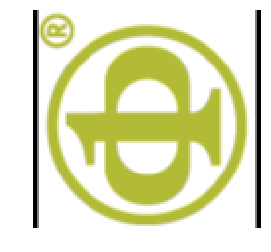

In [40]:
# Getting the shape of img
rows, cols, _ = cropped.shape

# Defining a pointer
center = (cols / 2, rows / 2)

# Rotation angle
angle = 90

# Defining rotation center
rotation_center = cv2.getRotationMatrix2D(center, angle, 1.0)

# Applying affine transformation
rotated = cv2.warpAffine(cropped, rotation_center, (cols,rows))

plt.axis("off")
plt.imshow(rotated)
plt.show()

## 1.4) Resizing

To realize the resizing of an image, it is possible use the following function:

<center>
    <strong>cv2.resize(image, dsize[, dst[, fx[, fy[, interpolation]]]]) → dst</strong>
</center>

where:

<ul>
    <li><i>image</i> – The image</li>
    <li><i>dsize</i> – Size of the output image.</li>
    <li><i>dst</i> – Output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.</li>
    <li><i>fx</i> – Scale factor along the horizontal axis; when it equals 0, it is computed as $\texttt{(double) dsize.width / src.cols}$.</li>
    <li><i>fy</i> – Scale factor along the vertical axis; when it equals 0, it is computed as $\texttt{(double) dsize.height / src.rows}$.</li>
    <li><i>interpolation</i> – 
        <ul>
            <li><b>INTER_NEAREST</b> – A nearest-neighbor interpolation.</li>
            <li><b>INTER_LINEAR</b> – A bilinear interpolation (used by default).</li>
            <li><b>INTER_AREA</b> – Resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method.</li>
            <li><b>INTER_CUBIC</b> – A bicubic interpolation over 4x4 pixel neighborhood.</li>
            <li><b>INTER_LANCZOS4</b> – A Lanczos interpolation over 8x8 pixel neighborhood.</li>
        </ul>
    </li>
</ul>

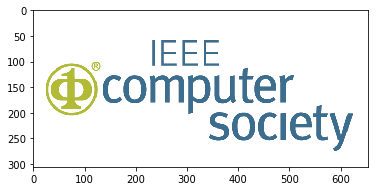

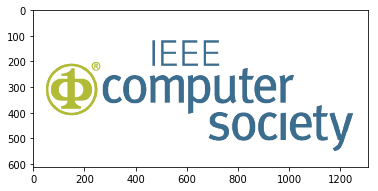

In [58]:
# Shape of image
rows, cols, _ = img.shape

# Scale factor
scale = 2

# Scaled image
scaled = cv2.resize(img, (round(scale * cols), round(scale * rows)))

plt.figure()
plt.imshow(img)
plt.show()

plt.figure()
plt.imshow(scaled)
plt.show()

## References

[1] Ted Dejony. 2018. image transformation. [ONLINE] Available at: http://www.timbercon.com/image-transformation.shtml. [Accessed 29 April 2018].

[2] Operations on Arrays — OpenCV 3.0.0-dev documentation. 2018. Operations on Arrays — OpenCV 3.0.0-dev documentation. [ONLINE] Available at: https://docs.opencv.org/3.0-beta/modules/core/doc/operations_on_arrays.html. [Accessed 30 April 2018].